Lab Report 04
Course Title: Digital Image Processing Lab
Course Code: CSE 438
-----------------------------------------------------------------------

Submitted By

Name: MD Al Shahriar Labib

ID: 212 505 1028

Section: 8A

Batch: 50th

Semester: Spring 2024

Department: CSE
-----------------------------------------------------------------------

Supervised By

Name: Audity Ghosh

Lecturer

Dept. of CSE (UITS)

Date: 12-April-2025


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import requests
from PIL import Image
from io import BytesIO

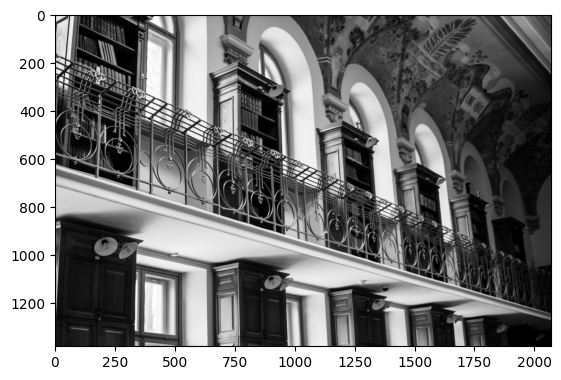

In [16]:
url = 'https://images.unsplash.com/photo-1702628772415-77b16000ce8c?q=80&w=2069&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
response = requests.get(url)
img_pil = Image.open(BytesIO(response.content)).convert('L')
img_color = Image.open(BytesIO(response.content)).convert('RGB')
img = np.array(img_pil)
plt.imshow(img, cmap='gray')
plt.show()

In [17]:
kernel = np.array([
    [1, 1, 1],
    [1, 2, 1],
    [1, 1, 1]
], dtype=np.float32)

# Normalize the kernel
kernel /= kernel.sum()

In [18]:
def apply_manual_filter(image, kernel):
    img_padded = np.pad(image, 1, mode='reflect')  # Padding to handle edges
    filtered_img = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = img_padded[i:i+3, j:j+3]
            filtered_value = np.sum(region * kernel)
            filtered_img[i, j] = filtered_value

    return np.clip(filtered_img, 0, 255).astype(np.uint8)

manual_filtered = apply_manual_filter(img, kernel)

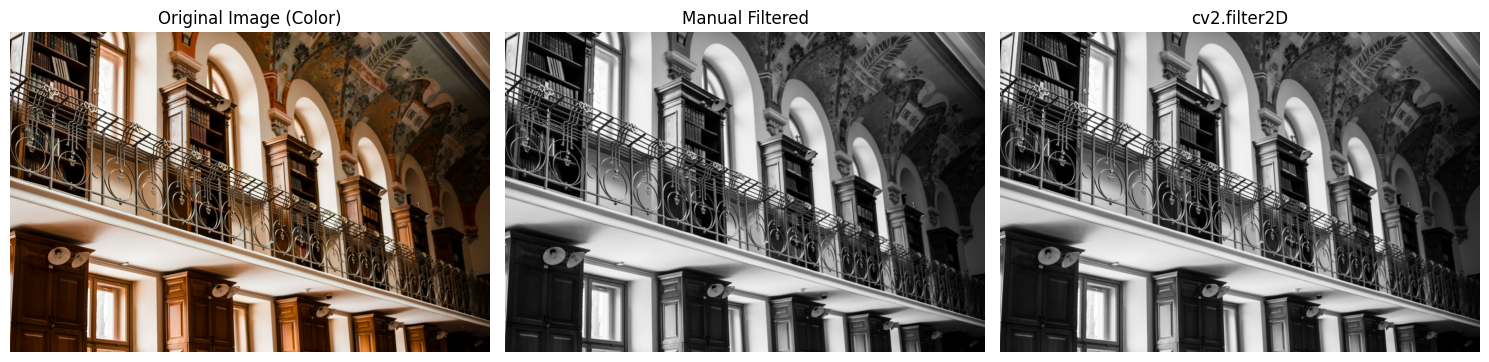

In [19]:
filtered_cv2 = cv2.filter2D(img, -1, kernel)

# Plotting the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image (Color)')
plt.imshow(img_color)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Manual Filtered')
plt.imshow(manual_filtered, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('cv2.filter2D')
plt.imshow(filtered_cv2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()